In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

In [33]:
from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics

In [4]:
#df_sales = pd.read_csv("data/item_sales.csv")
df_prices = pd.read_csv("/content/drive/MyDrive/data/item_prices.csv")

In [8]:
df_prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,328.00",12.74
1,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,329.00",12.74
2,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,330.00",10.99
3,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,331.00",10.99
4,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,332.00",10.99


In [5]:
df_prices.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [7]:
df_prices.describe()

,yearweek,sell_price
count,"6,721,786.00","6,965,706.00"
mean,"201,382.42",5.52
std,145.02,4.39
min,"201,105.00",0.01
25%,"201,248.00",2.62
50%,"201,410.00",4.20
75%,"201,515.00",7.18
max,"201,617.00",134.15


In [16]:
df_prices.query("yearweek.isnull()").head()

,item,category,store_code,yearweek,sell_price


In [10]:
# Adicionado zero para a semana do ano que esta null
df_prices["yearweek"].fillna(0, inplace=True)

In [17]:
df_prices.shape

(6965706, 5)

In [11]:
colunas = ['yearweek']
df_prices[colunas].astype("int16")

,yearweek
0,4720
1,4721
2,4722
3,4723
4,4724
...,...
6965701,0
6965702,0
6965703,0
6965704,0


In [12]:
colunas = df_prices.columns
colunas

Index(['item', 'category', 'store_code', 'yearweek', 'sell_price'], dtype='object')

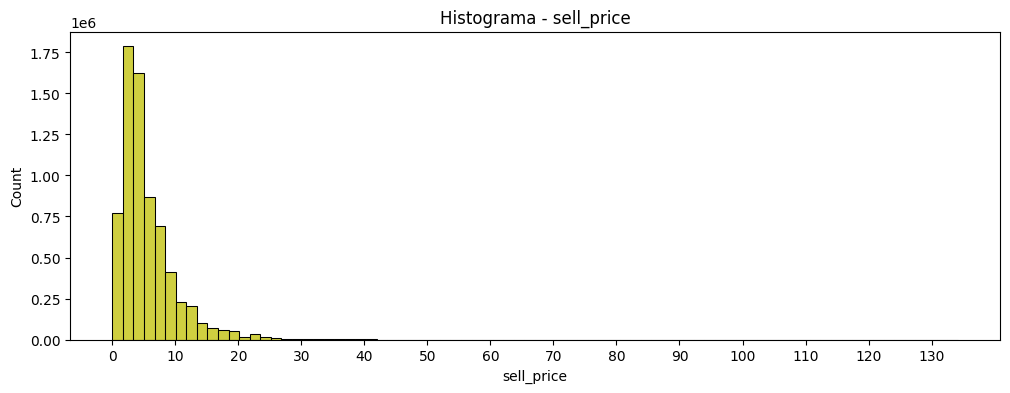

In [13]:
plt.figure(figsize=(12, 4), dpi=100)
sns.histplot(df_prices["sell_price"], bins = 80, color='y')

# Define os intervalos dos rótulos do eixo x
plt.xticks(range(0, int(df_prices["sell_price"].max()) + 1, 10))

plt.title("Histograma - sell_price")
plt.show()

In [18]:
df_prices.groupby(['yearweek','store_code', 'category'])['sell_price'].sum()

yearweek    store_code  category     
0.00        BOS_1       ACCESORIES      33,037.69
                        HOME_&_GARDEN   57,270.53
                        SUPERMARKET     45,824.52
            BOS_2       ACCESORIES      33,018.55
                        HOME_&_GARDEN   57,193.78
                                           ...   
201,617.00  PHI_2       HOME_&_GARDEN    7,164.78
                        SUPERMARKET      5,802.05
            PHI_3       ACCESORIES       4,185.47
                        HOME_&_GARDEN    7,167.38
                        SUPERMARKET      5,804.32
Name: sell_price, Length: 8400, dtype: float64

In [23]:
from sklearn.preprocessing import LabelEncoder

le_item = LabelEncoder()
le_category = LabelEncoder()
le_store_code = LabelEncoder()
le_yearweek = LabelEncoder()

In [24]:
df_prices["item_encoded"] = le_item.fit_transform(df_prices["item"])
df_prices["category_encoded"] = le_category.fit_transform(df_prices["category"])

df_prices["store_code_encoded"] = le_store_code.fit_transform(df_prices["store_code"])
df_prices["yearweek_encoded"] = le_yearweek.fit_transform(df_prices["yearweek"])

In [25]:
df_prices.drop(['item'],axis=1, inplace=True)
df_prices.drop(['category'],axis=1, inplace=True)

df_prices.drop(['store_code'], axis=1, inplace=True)
df_prices.drop(['yearweek'], axis=1, inplace=True)

In [26]:
df_prices.head(1)

,sell_price,item_encoded,category_encoded,store_code_encoded,yearweek_encoded
0,12.74,0,0,3,131


In [29]:
dev_df_X = df_prices.drop('sell_price', axis=1)
dev_df_y = df_prices[['sell_price']]


In [30]:
dev_df_X.head().T

,0,1,2,3,4
item_encoded,0,0,0,0,0
category_encoded,0,0,0,0,0
store_code_encoded,3,3,3,3,3
yearweek_encoded,131,132,133,134,135


In [31]:
dev_df_y.head().T

,0,1,2,3,4
sell_price,12.74,12.74,10.99,10.99,10.99


In [34]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X
                                        dev_df_y, # y
                                        test_size = 0.30,
                                        random_state = 42
                                     )

In [35]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4875994 entries, 539732 to 6413414
Columns: 4 entries, item_encoded to yearweek_encoded
dtypes: int64(4)
memory usage: 186.0 MB


In [36]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089712 entries, 2048946 to 831042
Columns: 4 entries, item_encoded to yearweek_encoded
dtypes: int64(4)
memory usage: 79.7 MB


In [37]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
item_encoded,"4,875,994.00","1,516.41",879.79,0.00,753.00,"1,512.00","2,285.00","3,048.00"
category_encoded,"4,875,994.00",1.28,0.76,0.00,1.00,1.00,2.00,2.00
store_code_encoded,"4,875,994.00",4.48,2.89,0.00,2.00,4.00,7.00,9.00
yearweek_encoded,"4,875,994.00",152.90,80.84,0.00,89.00,162.00,222.00,279.00


In [38]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
item_encoded,"2,089,712.00","1,516.55",879.75,0.00,754.00,"1,512.00","2,285.00","3,048.00"
category_encoded,"2,089,712.00",1.28,0.76,0.00,1.00,1.00,2.00,2.00
store_code_encoded,"2,089,712.00",4.48,2.89,0.00,2.00,4.00,7.00,9.00
yearweek_encoded,"2,089,712.00",152.81,80.76,0.00,89.00,162.00,222.00,279.00


In [39]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
sell_price,"4,875,994.00",5.52,4.39,0.01,2.62,4.20,7.18,134.15


In [40]:
y_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
sell_price,"2,089,712.00",5.52,4.39,0.01,2.62,4.20,7.18,134.15


Training the Multiple Linear Regression model on the Training set

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
def evaluate_model(y_test, y_pred):
  test_r2 = r2_score(y_test, y_pred)
  test_mae = mean_absolute_error(y_test, y_pred)
  test_mse = mean_squared_error(y_test, y_pred)
  test_rmse = np.sqrt(test_mse)

  print("R2: {}".format(test_r2))
  print("MAE: {}".format(test_mae))
  print("MSE: {}".format(test_mse))
  print("RMSE: {}".format(test_rmse))

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
intercept = regressor.intercept_
print("Intercept: {}".format(intercept))

coefficient = regressor.coef_
print("coefficient: {}".format(coefficient))

Intercept: [7.8630876]
coefficient: [[-0.00117257 -0.57725361  0.00711106  0.00090608]]


In [43]:
y_pred = regressor.predict(X_test)
print(y_pred)

[[3.35504717]
 [3.62855877]
 [6.55755646]
 ...
 [4.74230868]
 [4.2588159 ]
 [7.51471341]]


In [45]:
evaluate_model(y_test, y_pred)

R2: 0.10834179040757363
MAE: 2.8634526398078166
MSE: 17.19782764560267
RMSE: 4.147026361816701


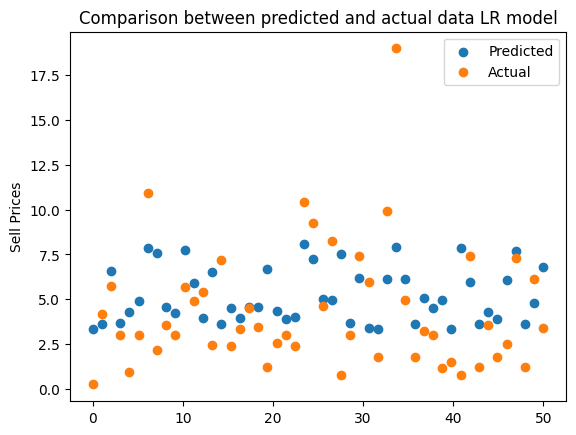

In [46]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_s = y_pred[:50]
y_test_s = y_test[:50]
x = np.linspace(0, len(y_pred_s),len(y_pred_s))

plt.scatter(x, y_pred_s, label='Predicted')
plt.scatter(x, y_test_s, label='Actual')
plt.ylabel("Sell Price")
plt.legend()
plt.title("Comparison between predicted and actual data LR model")
plt.show()